# PRE-PROCESSING et MACHINE LEARNING

## Importer les librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

df=pd.read_csv("df_clean.csv")

<Axes: >

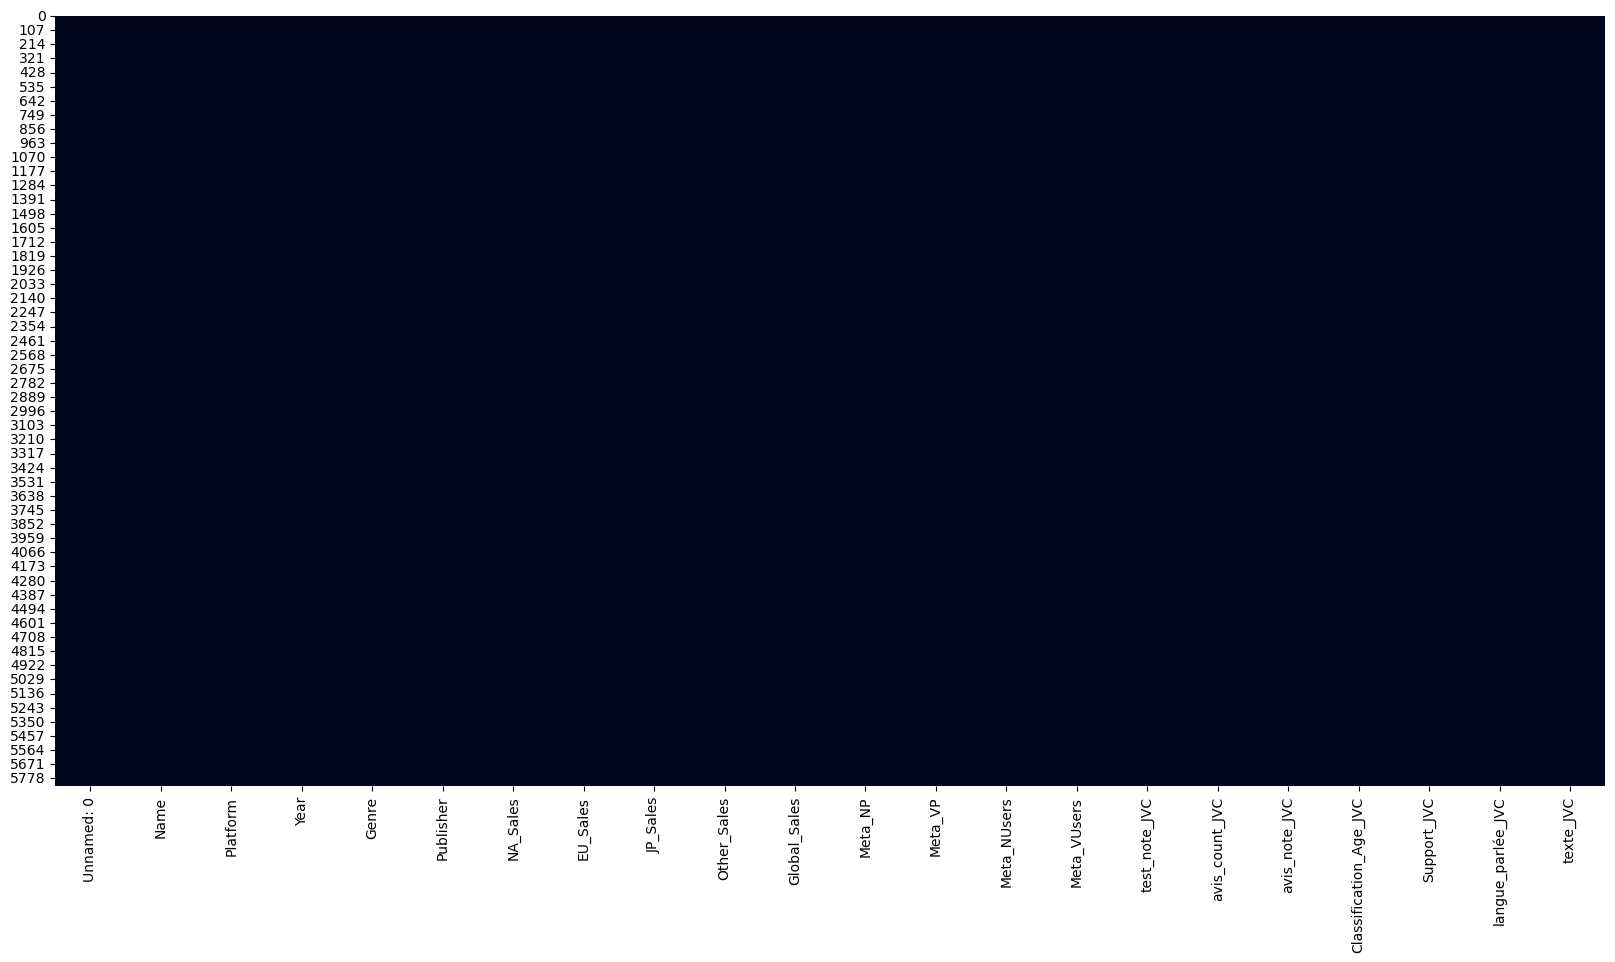

In [2]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## regression linéaire

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=data.drop('Global_Sales', axis=1)
target=data['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(data, target,  test_size=0.2, random_state=42)


In [ ]:
# Sélectionne toutes les colonnes numériques
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

# Sélectionne toutes les colonnes catégorielles
X_train_cat = X_train.select_dtypes(include=['object'])
X_test_cat = X_test.select_dtypes(include=['object'])

In [8]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

cat=['Name', 'Platform', 'Genre', 'Publisher', 'Support_JVC']

X_train.loc[:,cat]=ohe.fit_transform(X_train[cat])
X_test.loc[:,cat]=ohe.transform(X_test[cat])

IndexError: tuple index out of range

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

oe.fit(X_train_cat)
oe.fit_transform(X_test_cat)


In [ ]:
X_train=np.concatenate((X_train_num, X_train_cat))
X_test=np.concatenate((X_test_num, X_test_cat))

## Modellisation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC # utile sur dataset de 1000 à 2000 données
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [ ]:
model=DecisionTreeClassifier(random_state=0)

model_1 = RandomForestClassifier(random_state=0)


In [ ]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [ ]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost= make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [ ]:
dict_of_models={'RandomForest':RandomForest, 'AdaBoost':AdaBoost, 'SVM':SVM, 'KNN':KNN}

## Procédure d'évaluation

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [ ]:
for name,model in dict_of_models.items():
    print(name)
    evaluation(model)